In [5]:
import pandas as pd

# Read the data
df = pd.read_csv('../data/c4_general_cafeteria_select.csv')

In [6]:
# df에 NAN이 있는지 확인
print('\n=====NAN 유무 확인=====')
print(df.isnull().sum())

# df에 NAN이 있는 행을 삭제
df = df.dropna()
df = df.reset_index(drop=True)
print('\n=====NAN 제거 확인=====')
print(df.isnull().sum())


=====NAN 유무 확인=====
번호            0
인허가일자         0
영업상태구분코드      0
소재지전체주소     207
사업장명          0
업태구분명         2
시설총규모         0
최종수정시점        0
dtype: int64

=====NAN 제거 확인=====
번호          0
인허가일자       0
영업상태구분코드    0
소재지전체주소     0
사업장명        0
업태구분명       0
시설총규모       0
최종수정시점      0
dtype: int64


In [7]:
# 데이터 전처리
# df에 '소재지전체주소'를 '시도'와 '구군'으로 분리
df['시/도'] = df['소재지전체주소'].str.split(' ').str[0]
df['구군'] = df['소재지전체주소'].str.split(' ').str[1]
df['동/면'] = df['소재지전체주소'].str.split(' ').str[2]
df['상세주소'] = df['소재지전체주소'].str.split(' ').str[3:].str.join(' ')
print('\n=====시도와 구군 분리 확인=====')
df.head()


=====시도와 구군 분리 확인=====


,번호,인허가일자,영업상태구분코드,소재지전체주소,사업장명,업태구분명,시설총규모,최종수정시점,시/도,구군,동/면,상세주소
0,1,2023-08-02,1,강원특별자치도 삼척시 남양동 55-4 중앙시장,왕성식당,한식,25.12,2023-08-02 11:25:07,강원특별자치도,삼척시,남양동,55-4 중앙시장
1,2,2023-08-17,1,강원특별자치도 삼척시 갈천동 14-5,서프키키,경양식,120.00,2023-08-17 15:24:39,강원특별자치도,삼척시,갈천동,14-5
2,3,2023-08-25,1,강원특별자치도 삼척시 정하동 108-20 정라식육점,복순네국수집,한식,23.52,2023-08-25 14:31:22,강원특별자치도,삼척시,정하동,108-20 정라식육점
3,4,2023-07-14,1,강원특별자치도 삼척시 근덕면 용화리 14-5 해양레일바이크,해변꼬치,식육(숯불구이),25.00,2023-07-14 09:47:58,강원특별자치도,삼척시,근덕면,용화리 14-5 해양레일바이크
4,5,2023-07-11,1,강원특별자치도 삼척시 근덕면 교가리 662-5,해조림찜,한식,28.49,2023-07-11 11:07:33,강원특별자치도,삼척시,근덕면,교가리 662-5


/var/folders/vm/5qmxs2qx4jqfzfp5dmt_3x900000gn/T/ipykernel_46514/2477554656.py:16: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')
/var/folders/vm/5qmxs2qx4jqfzfp5dmt_3x900000gn/T/ipykernel_46514/2477554656.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='시/도', palette='Set1')


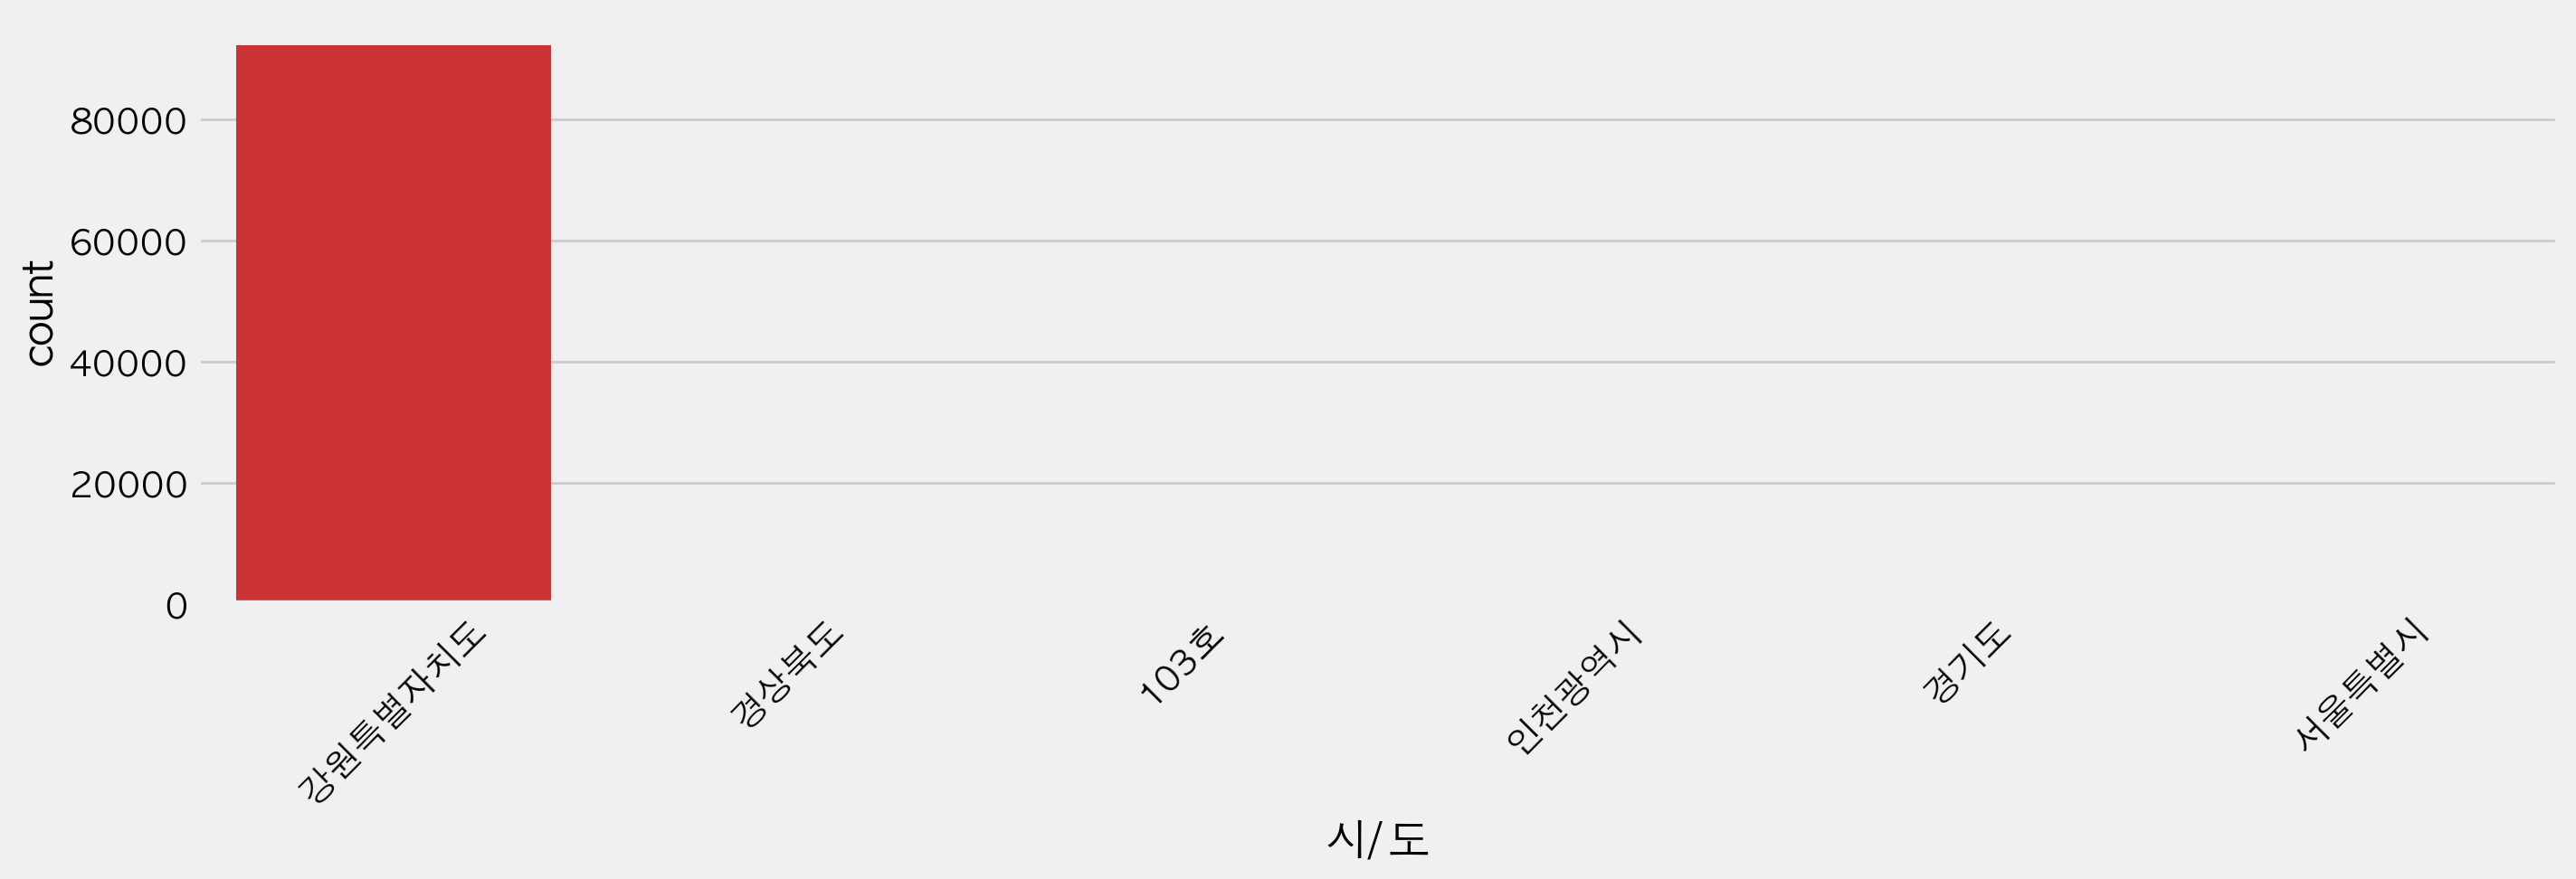

ValueError: Could not interpret value `구/군` for `x`. An entry with this name does not appear in `data`.

<Figure size 1500x400 with 0 Axes>

In [8]:
# 구군 별로 데이터를 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정(애플고딕)
plt.rc('font', family='AppleGothic')

# 그래프에 마이너스 표시가 되도록 설정
plt.rc('axes', unicode_minus=False)

# 그래프 스타일 설정
plt.style.use('fivethirtyeight')

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# 그래프에 한글 표시
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
font_list[:]
plt.rcParams['font.family'] = 'AppleGothic'

# 구군 별로 데이터를 시각화
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x='시/도', palette='Set1')
plt.xticks(rotation=45)
plt.show()

# 구군 별로 데이터를 시각화
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x='구/군', palette='Set2')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 시/도 중 강원도만 선택
df = df[df['시/도'] == '강원특별자치도']
df = df.reset_index(drop=True)
print('\n=====강원도 데이터 확인=====')
df

In [ ]:
# 시/도 중 강원도만 선택
df = df[df['구군'] == '춘천시']
df = df.reset_index(drop=True)
print('\n=====강원도 춘천시 데이터 확인=====')
df

In [ ]:
# 구군 별로 데이터를 시각화
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x='동/면', palette='Set3')
plt.xticks(rotation=45)
plt.title('강원도 춘천시에 등록된 일반음식점')
plt.show()

In [ ]:
# 영업상태명이 영업중인 데이터만 선택 후 시각화에 사용
df = df[df['영업상태구분코드'] == 1]
df = df.reset_index(drop=True)
print('\n=====영업중인 데이터 확인=====')

# 구군 별로 데이터를 시각화
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x='동/면', palette='Set3')
plt.xticks(rotation=45)
plt.title('강원도 춘천시의 영업중인 일반음식점')
plt.show()

In [ ]:
# # 저장
# df.to_csv('../data/c4_general_cafeteria_chuncheon_CC_opened.csv', index=False)

In [ ]:
# 시/도 중 강원도만 선택
# '석사동', '효자동' 데이터만 선택

df = df[df['동/면'].isin(['석사동', '효자동'])]
df = df.reset_index(drop=True)
print('\n=====강원도 춘천시 데이터 확인=====')
df

In [ ]:
# 구군 별로 데이터를 시각화
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x='동/면', palette='Set4')
plt.xticks(rotation=45)
plt.title('강원도 춘천시에 등록된 일반음식점(석사동, 효자동)')
plt.show()